In [118]:
# Imports
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [119]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [120]:
# Load data
df = pd.read_csv('merged-data.csv')
df = df.dropna()
df.head()

,id,radar,time,average,max,install,site
0,0,1,09-11-2021 0:00,45.541888,65.26,0,50
1,1,1,09-11-2021 1:00,44.298992,62.87,0,50
2,2,1,09-11-2021 2:00,44.423393,74.57,0,50
3,3,1,09-11-2021 3:00,45.502300,66.85,0,50
4,4,1,09-11-2021 4:00,46.588100,64.86,0,50


In [122]:
# Convert "time" header from string to datetime object
df['time'] = pd.to_datetime(df['time'])
df.dtypes

id                  int64
radar               int64
time       datetime64[ns]
average           float64
max               float64
install             int64
site                int64
dtype: object

In [176]:
# Add hour column as numeric in 24h clock and date extracted to separate column. 
df['hour'] = df['time'].dt.hour
df['date'] = df['time'].dt.date
df.head()

,id,radar,time,average,max,install,site,hour,limit,date
0,0,1,2021-09-11 00:00:00,45.541888,65.26,0,50,0,50,2021-09-11
1,1,1,2021-09-11 01:00:00,44.298992,62.87,0,50,1,50,2021-09-11
2,2,1,2021-09-11 02:00:00,44.423393,74.57,0,50,2,50,2021-09-11
3,3,1,2021-09-11 03:00:00,45.502300,66.85,0,50,3,50,2021-09-11
4,4,1,2021-09-11 04:00:00,46.588100,64.86,0,50,4,50,2021-09-11


In [177]:
# Add 'limit' column as numeric, km/h speed limit
df['limit'] = df['site'].apply(lambda a : 100 - a)
df.head()

,id,radar,time,average,max,install,site,hour,limit,date
0,0,1,2021-09-11 00:00:00,45.541888,65.26,0,50,0,50,2021-09-11
1,1,1,2021-09-11 01:00:00,44.298992,62.87,0,50,1,50,2021-09-11
2,2,1,2021-09-11 02:00:00,44.423393,74.57,0,50,2,50,2021-09-11
3,3,1,2021-09-11 03:00:00,45.502300,66.85,0,50,3,50,2021-09-11
4,4,1,2021-09-11 04:00:00,46.588100,64.86,0,50,4,50,2021-09-11


In [178]:
# Average speeds by each radar
df.groupby('radar').mean()['average']

radar
1    42.402413
2    45.011580
3    35.406835
Name: average, dtype: float64

In [179]:
# Average speeds by each site
df.groupby('site').mean()['average']

site
50    43.701983
60    35.406835
Name: average, dtype: float64

In [180]:
# Max speeds by each radar
df.groupby('radar').max()['max']

radar
1    208.49
2    178.05
3    113.22
Name: max, dtype: float64

In [181]:
# Max speeds by each site
df.groupby('site').max()['max']

site
50    208.49
60    113.22
Name: max, dtype: float64

In [183]:
# By Hour Helper Functions
def avg_by_hr(radar: int, install: int=None, limit: bool=False) -> np.array:
    if install == None:
        if limit:
            return df[df['radar'] == radar].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
        return df[df['radar'] == radar].groupby('hour').mean()['average'].values
    if limit:
        return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
    return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values

def max_by_hr(radar: int, install: int=None, limit: bool=False) -> np.array:
    if install == None:
        if limit:
            return df[df['radar'] == radar].groupby('hour').max()['max'].values - df[df['radar'] == radar]['limit'].tolist()[0]
        return df[df['radar'] == radar].groupby('hour').max()['max'].values
    if limit:
        return df[df['radar'] == radar][df['install'] == install].groupby('hour').max()['max'].values - df[df['radar'] == radar]['limit'].tolist()[0]
    return df[df['radar'] == radar][df['install'] == install].groupby('hour').max()['max'].values

def avg_by_day(radar: int, install: int=None, limit: bool=False) -> np.array:
    if install == None:
        if limit:
            return df[df['radar'] == radar].groupby('date').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
        return df[df['radar'] == radar].groupby('date').mean()['average'].values
    if limit:
        return df[df['radar'] == radar][df['install'] == install].groupby('date').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
    return df[df['radar'] == radar][df['install'] == install].groupby('date').mean()['average'].values

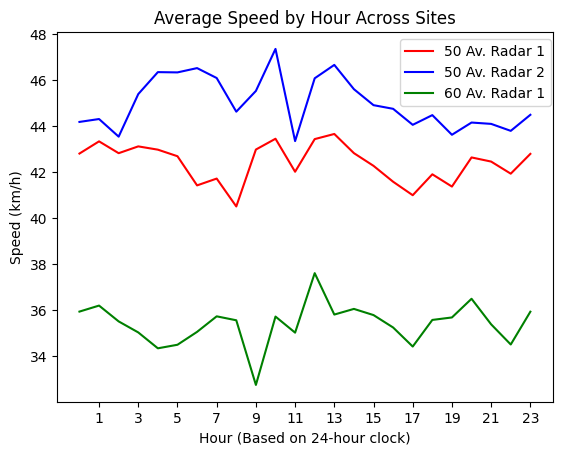

In [130]:
# Lineplot by hour
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites')
plt.savefig('avg-speed-by-hr-across-sites.png')

/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values


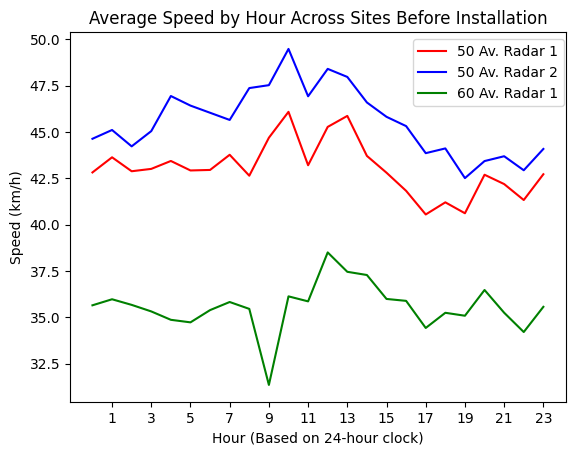

In [131]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 0), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 0), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 0), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites Before Installation')
plt.savefig('avg-speed-by-hr-across-sites-before-install.png')

/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values


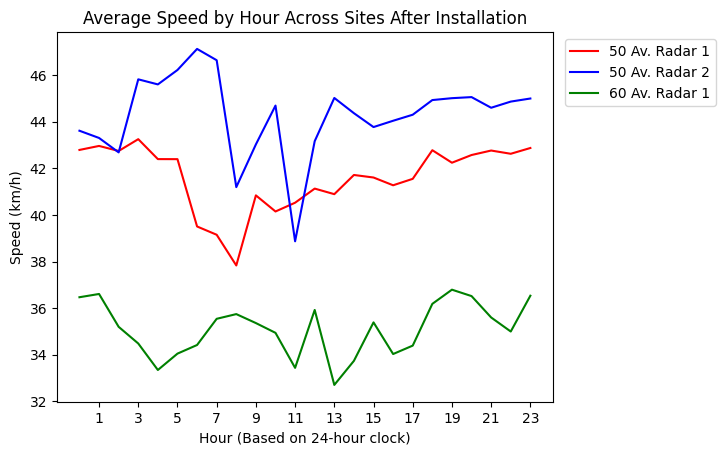

In [132]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 1), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 1), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 1), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites After Installation')
plt.savefig('avg-speed-by-hr-across-sites-after-install.png')

/tmp/ipykernel_1237319/1343599599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_1237319/1343599599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_1237319/1343599599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]


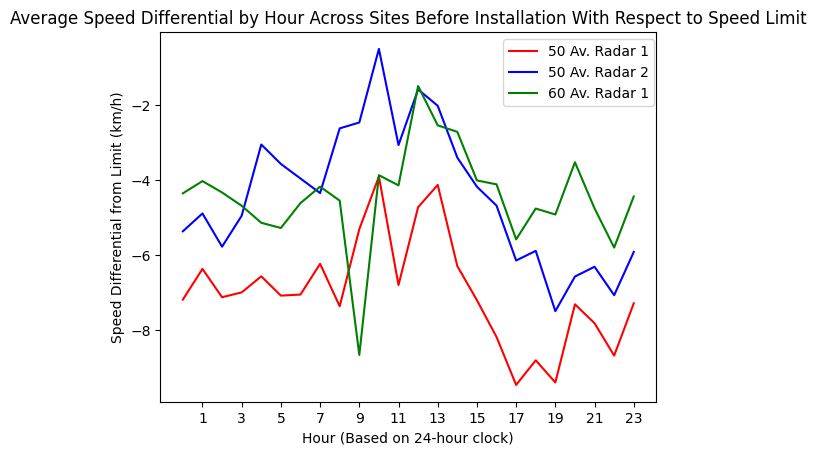

In [133]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 0, True), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 0, True), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 0, True), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed Differential from Limit (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed Differential by Hour Across Sites Before Installation With Respect to Speed Limit')
plt.savefig('avg-speed-by-hr-across-sites-before-install-wrt-limit.png')

/tmp/ipykernel_1237319/1343599599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_1237319/1343599599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_1237319/1343599599.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]


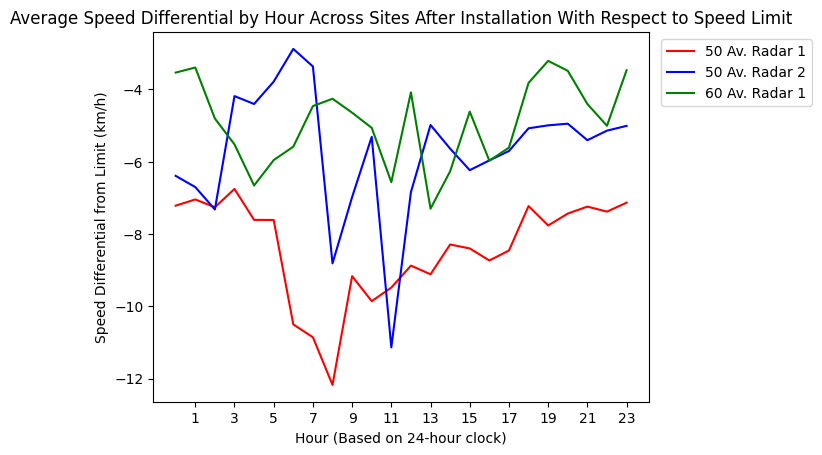

In [134]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 1, True), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 1, True), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 1, True), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed Differential from Limit (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed Differential by Hour Across Sites After Installation With Respect to Speed Limit')
plt.savefig('avg-speed-by-hr-across-sites-after-install-wrt-limit.png')

In [209]:
#len(avg_by_day(2)[:-3])
dates = df[df['radar'] == 3]['date'].unique()

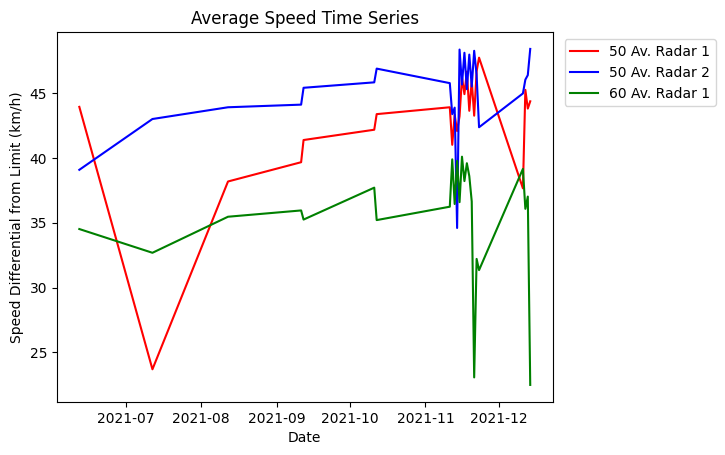

In [210]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=dates, y=avg_by_day(1, None, True)[:-4], color='red', label="50 Av. Radar 1")
sns.lineplot(x=dates, y=avg_by_day(2, None, True)[:-3], color='blue', label="50 Av. Radar 2")
sns.lineplot(x=dates, y=avg_by_day(3, None, True), color='green', label="60 Av. Radar 1")
plt.xlabel('Date')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed Time Series')
plt.savefig('avg-speed-time-series.png')

/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values


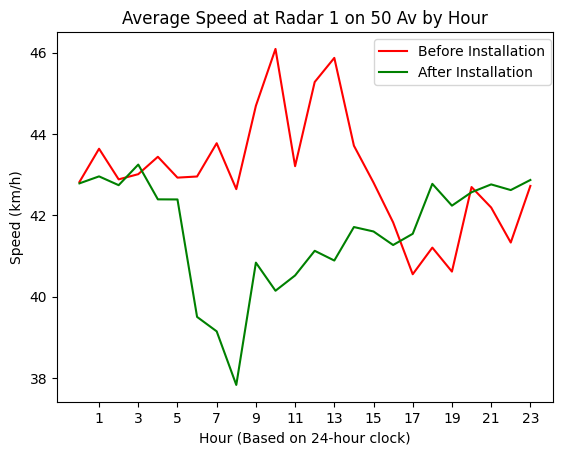

In [135]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 0), color='red', label='Before Installation')
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 1), color='green', label='After Installation')
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed at Radar 1 on 50 Av by Hour')
plt.savefig('avg-speed-radar-1-50-ave-by-hr.png')

/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values


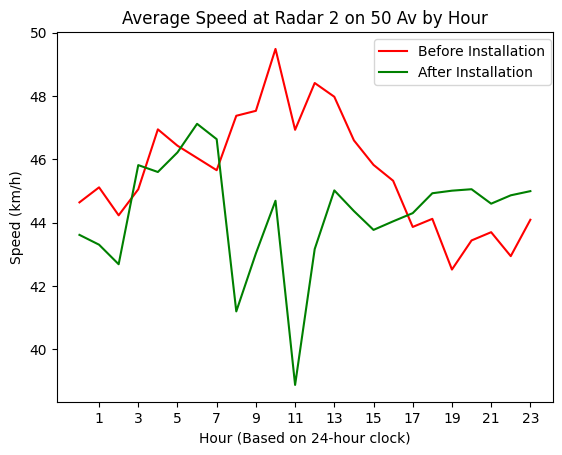

In [136]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 0), color='red', label='Before Installation')
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 1), color='green', label='After Installation')
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed at Radar 2 on 50 Av by Hour')
plt.savefig('avg-speed-radar-2-50-ave-by-hr.png')

/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_1237319/1343599599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values


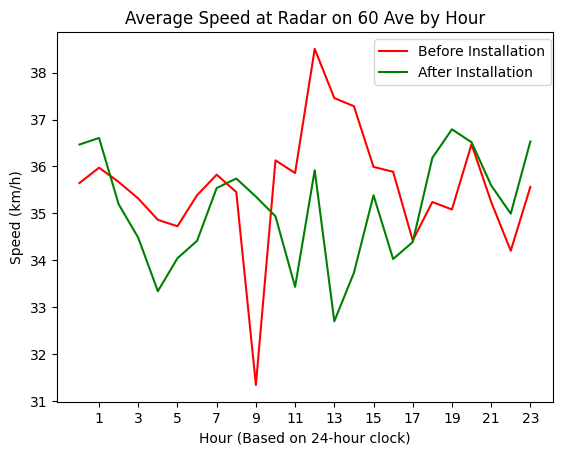

In [137]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 0), color='red', label='Before Installation')
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 1), color='green', label='After Installation')
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed at Radar on 60 Ave by Hour')
plt.savefig('avg-speed-radar-3-60-ave-by-hr.png')

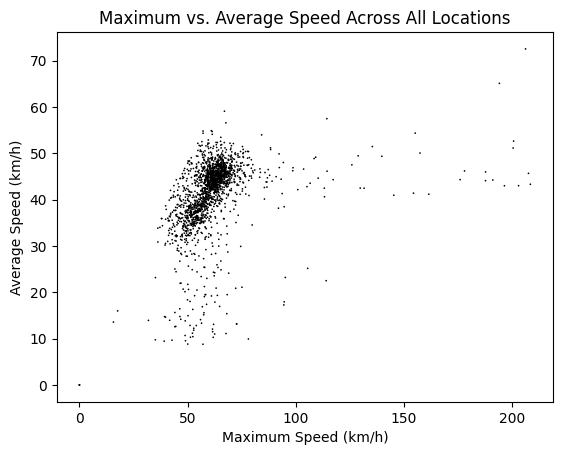

In [169]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(data=df, x='max', y='average', s=1.5, edgecolor="none", color='black')
plt.xlabel('Maximum Speed (km/h)')
plt.ylabel('Average Speed (km/h)')
plt.title('Maximum vs. Average Speed Across All Locations')
plt.savefig('max-v-avg.png')

In [69]:
def _get_wcss(x: pd.DataFrame, m: int) -> list:
    wcss=[]
    for i in range(1,m):
        kmeans = KMeans(i)
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    return wcss

In [170]:
def elbowplot(x: pd.DataFrame, m: int):
    mpl.rcParams.update(mpl.rcParamsDefault)
    wcss = _get_wcss(m, x)
    number_clusters = range(1,m)
    plt.plot(number_clusters, wcss)
    plt.title('Optimum Number of Clusters Using Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.savefig('elbowplot.png')

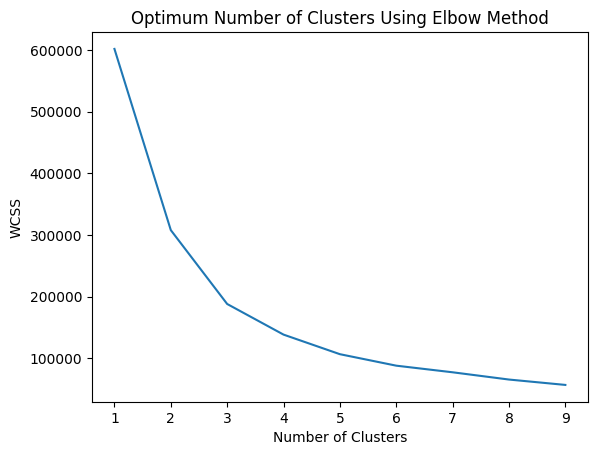

In [171]:
elbowplot(df.iloc[:,3:5], 10)
# yields elbow of 3

In [172]:
def get_kmeans_clusters(x: pd.DataFrame, df: pd.DataFrame, n: int) -> pd.DataFrame:
    kmeans = KMeans(n)
    kmeans.fit(x)
    clusters = kmeans.fit_predict(x)
    df_clusters = df.copy()
    df_clusters['cluster'] = clusters
    return df_clusters

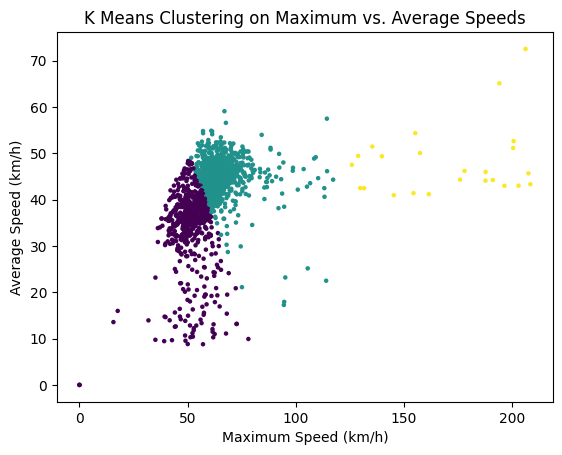

In [184]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.scatter(data=get_kmeans_clusters(df.iloc[:,3:5], df, 3), x='max', y='average', c='cluster', s=5)
plt.xlabel('Maximum Speed (km/h)')
plt.ylabel('Average Speed (km/h)')
plt.title('K Means Clustering on Maximum vs. Average Speeds')
plt.savefig('kmeans-max-v-avg.png')

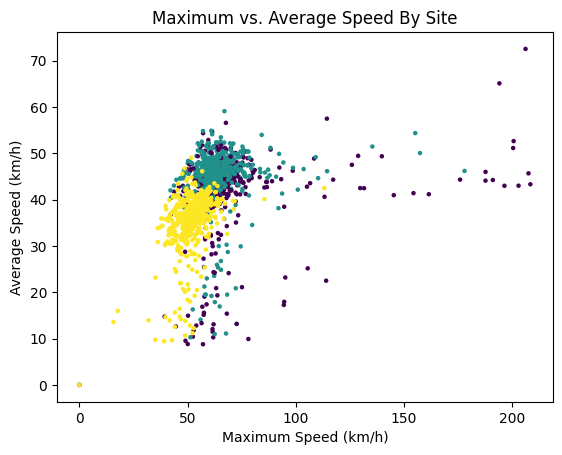

In [185]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.scatter(data=df, x='max', y='average', c='radar', cmap='viridis', s=5)
plt.xlabel('Maximum Speed (km/h)')
plt.ylabel('Average Speed (km/h)')
plt.title('Maximum vs. Average Speed By Site')
plt.savefig('max-v-avg-colored-by-site.png')

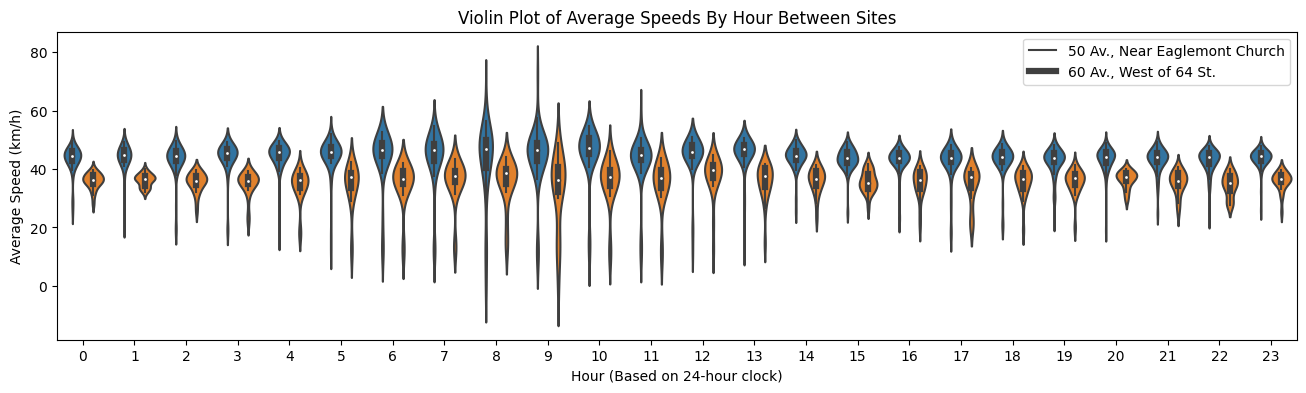

In [227]:
rcParams['figure.figsize'] = 16,4
sns.violinplot(data=df, x='hour', y='average', hue='site', s=3, edgecolor="none")
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Average Speed (km/h)')
plt.title('Violin Plot of Average Speeds By Hour Between Sites')
plt.legend(['50 Av., Near Eaglemont Church', '60 Av., West of 64 St.'])
plt.savefig('violin-plot-avg-speeds-by-hr-btw-sites-horiz.png')

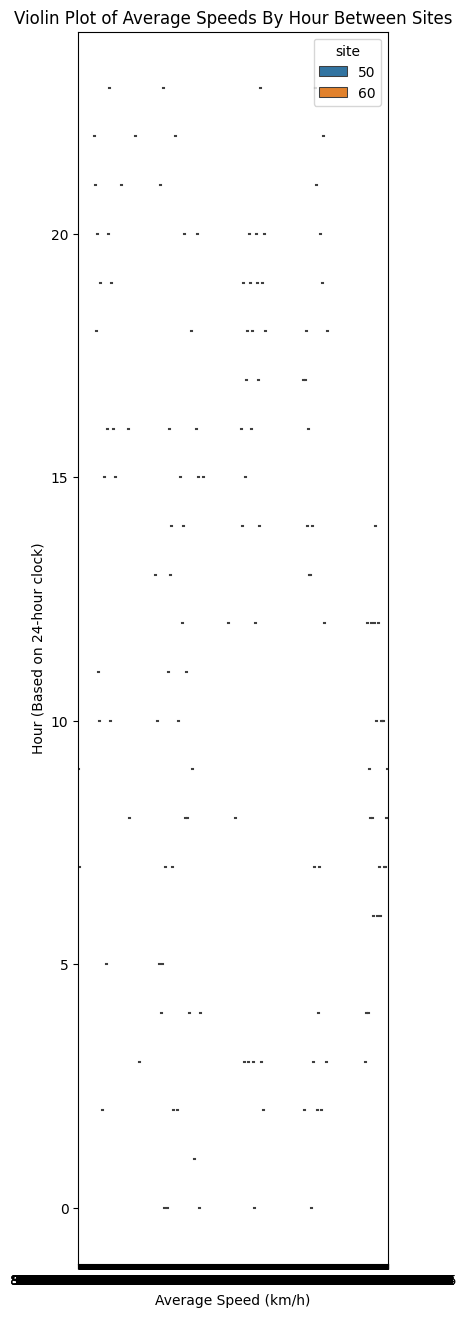

In [221]:
rcParams['figure.figsize'] = 4,16
sns.violinplot(data=df, x='average', y='hour', hue='site', s=3, edgecolor="none", orient='v')
plt.ylabel('Hour (Based on 24-hour clock)')
plt.xlabel('Average Speed (km/h)')
plt.title('Violin Plot of Average Speeds By Hour Between Sites')
plt.savefig('violin-plot-avg-speeds-by-hr-btw-sites-vert.png')

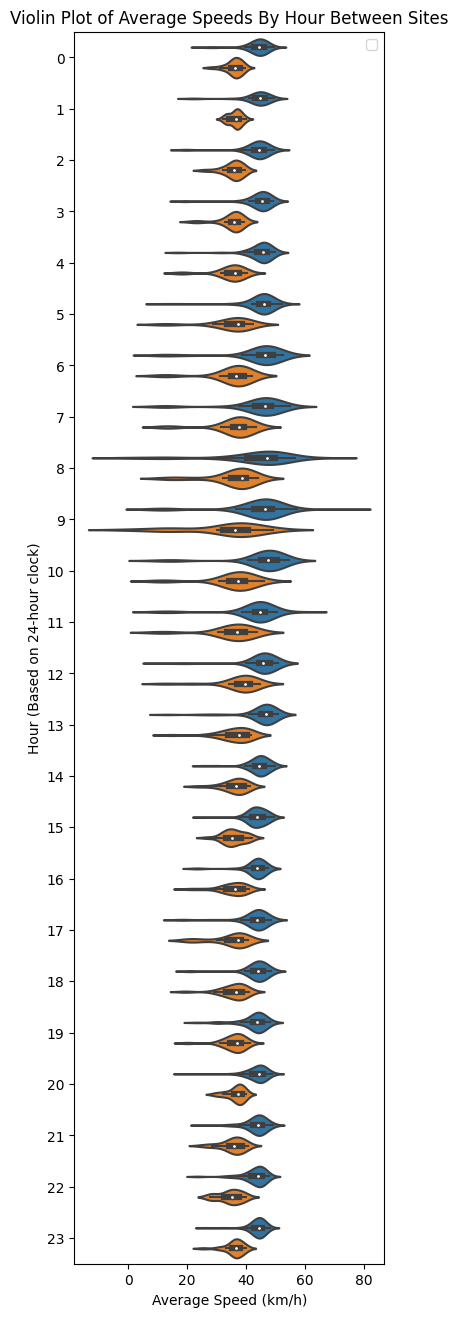

In [226]:
rcParams['figure.figsize'] = 4,16
sns.violinplot(data=df, x='average', y='hour', hue='site', s=3, edgecolor="none", orient='h')
plt.ylabel('Hour (Based on 24-hour clock)')
plt.xlabel('Average Speed (km/h)')
plt.title('Violin Plot of Average Speeds By Hour Between Sites')
plt.legend([])
plt.savefig('violin-plot-avg-speeds-by-hr-btw-sites-vert.png')

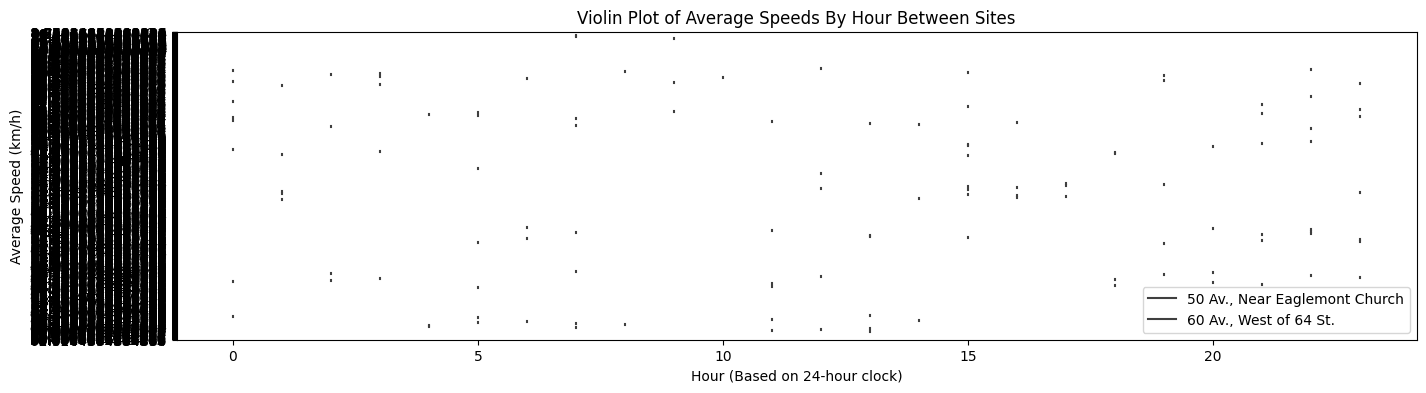

In [219]:
rcParams['figure.figsize'] = 16,4
sns.violinplot(data=df, x='hour', y='average', hue='site', s=3, edgecolor="none", orient='h')
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Average Speed (km/h)')
plt.title('Violin Plot of Average Speeds By Hour Between Sites')
plt.legend(['50 Av., Near Eaglemont Church', '60 Av., West of 64 St.'])
plt.savefig('violin-plot-avg-speeds-by-hr-btw-sites-horiz.png')

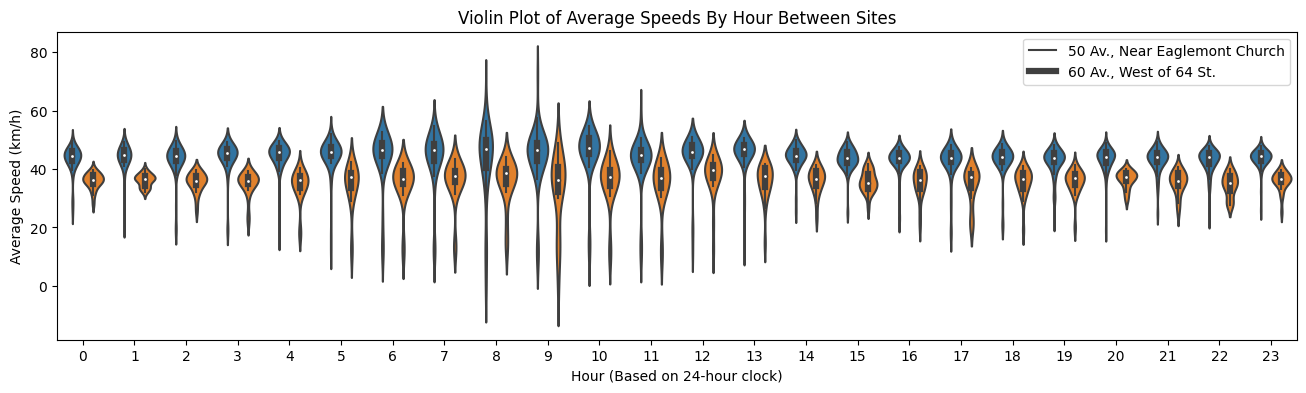

In [220]:
rcParams['figure.figsize'] = 16,4
sns.violinplot(data=df, x='hour', y='average', hue='site', s=3, edgecolor="none", orient='v')
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Average Speed (km/h)')
plt.title('Violin Plot of Average Speeds By Hour Between Sites')
plt.legend(['50 Av., Near Eaglemont Church', '60 Av., West of 64 St.'])
plt.savefig('violin-plot-avg-speeds-by-hr-btw-sites-horiz.png')